# CS 136 day05 Lab: Beta distributions and the Beta-Bernoulli model for coin tosses

In [1]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

## Beta Distribution: Standard Numerical implementations

Thankfully, you can use the built-in functions from SciPy to compute this function:

* `stats.beta.pdf(\cdot)` computes the pdf$
* `stats.beta.logpdf(\cdot)` computes the natural log of the pdf
* * Will often be more numerically stable than doing `np.log(stats.beta.pdf(\cdot))`

See <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html>


* Scipy.stats has *many* great resources for evaluating PDFs and for sampling
* * Evaluate pdf with `scipy.stats.<distribution>(hyperparameters).pdf(values)` (can use the `logpdf` instead of `pdf`)
* * Draw samples with `scipy.stats.<distribution>(hyperparameters).rvs(size=(nrows,ncols), random_state=SEED)`

## Visualization: PDF across different values of hyperparameters a, b

We'll make a grid plot, where each grid cell shows the PDF for a single $a, b$ pair.

Don't worry too much about the code to generate the visualization.

### 1a: Examine this visualization of how a and b affect the distribution of mu.  

/Users/isaaclage/anaconda3/envs/spr_2021s_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:607: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)
/Users/isaaclage/anaconda3/envs/spr_2021s_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:607: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)
/Users/isaaclage/anaconda3/envs/spr_2021s_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:607: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)
/Users/isaaclage/anaconda3/envs/spr_2021s_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:607: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)
/Users/isaaclage/anaconda3/envs/spr_2021s_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:607: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost

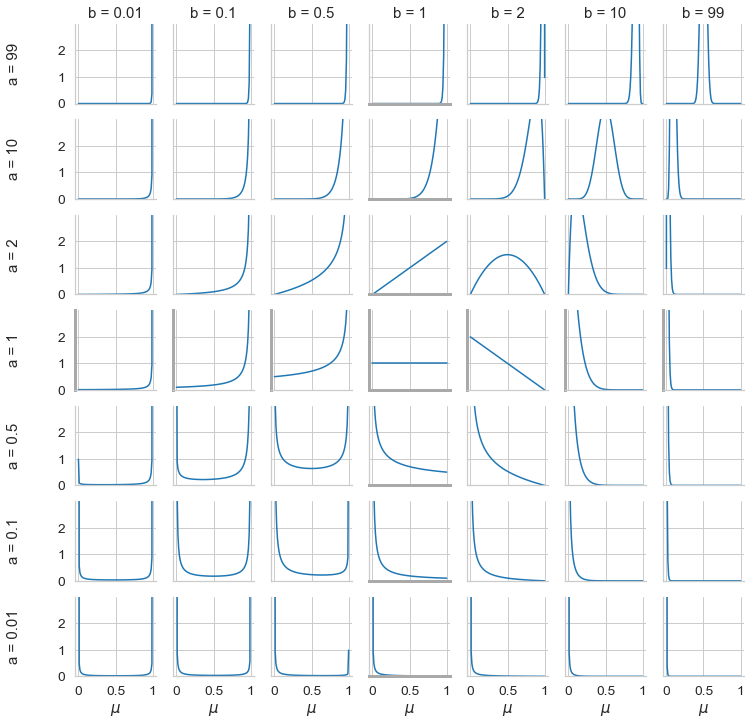

In [2]:
agrid_G = np.asarray([0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 99.0])
bgrid_H = np.asarray([0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 99.0])
G = agrid_G.size
H = bgrid_H.size

mu_vals = np.linspace(0.0001, 0.9999, 101)

fig, axgrid = plt.subplots(nrows=len(agrid_G), ncols=len(bgrid_H), sharex=True, sharey=True, figsize=(12, 12));
axgrid = axgrid[::-1] # flip order of rows

for gg in range(G):
    for hh in range(H):
        # Evaluate Beta PDF at each candidate value of mu in "mu_vals"
        axgrid[gg, hh].plot(mu_vals, scipy.stats.beta(agrid_G[gg], bgrid_H[hh]).pdf(mu_vals), '-')
        if hh == 0:
            axgrid[gg, hh].set_ylabel('a = %.2g\n\n' % agrid_G[gg]);
        if gg == G - 1:
            axgrid[gg, hh].set_title('b = %.2g' % bgrid_H[hh]);
        if gg == 0:
            axgrid[gg, hh].set_xlabel('$\mu$');

        if agrid_G[gg] == 1.0:
            axgrid[gg, hh].spines['left'].set_linewidth(3)
            axgrid[gg, hh].spines['left'].set_color('darkgray')
        if bgrid_H[hh] == 1.0:
            axgrid[gg, hh].spines['bottom'].set_linewidth(3)
            axgrid[gg, hh].spines['bottom'].set_color('darkgray')

H = 3.0
B = 0.05
sns.despine(fig)
axgrid[0,0].set_ylim(0, H); axgrid[0,0].set_yticks(np.arange(0, H, 1.0));
axgrid[0,0].set_xlim(-B, 1+ B); axgrid[0,0].set_xticks([0, 0.5, 1.0]); axgrid[0,0].set_xticklabels(['0', '0.5', '1']);

#plt.savefig('day03-beta_pdf_viz.pdf', bbox_inches='tight', pad_inches=0);

### 1b: Inspect 20 samples from a Beta(10, 10). What do you notice about them?

In [3]:
a = 10
b = 10
mu_samples = scipy.stats.beta(a,b).rvs(size=20, random_state=0)

np.set_printoptions(precision=3, suppress=True)
print(mu_samples)

[0.597 0.707 0.459 0.549 0.509 0.625 0.238 0.762 0.504 0.603 0.502 0.534
 0.494 0.377 0.395 0.464 0.477 0.584 0.327 0.546]


TODO what do you notice? How does what you see agree or disagree with the PDF visualizations we created above?

### 1c: Draw 20 samples from a Beta(1, 2). What do you notice?

In [4]:
## TODO: fill in the code based on the example above.

TODO what do you notice? How does what you see agree or disagree with the PDF visualizations we created above?

### 1d: Specify parameters a and b to encode the prior information that a coin is heavily weighted towards heads or tails?

I.e. what are a choice of a and b so most of the mus sampled from the Beta distribution with those parameters will be close to 0 or 1?

### 1e: Draw 20 samples from your specified Beta. What do you notice?

In [5]:
## TODO: fill in the code based on the example above.

TODO what do you notice? How does what you see agree or disagree with the PDF visualizations we created above?  Does it have the property we wanted it to have? (Most mu are either close to 0 or 1?)